## Acquisition Analytics : Bank Marketing

We will understand the business objective and understand the data using univariate and multivariate analysis. Then we'll build multiple supervised learning models, choose the best among them and analyze the financial benefits of the analytics project.

- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

The objective is to reduce the customer acquisition cost by targeting the ones who are likely to buy and to improve the response rate, i.e. the fraction of prospects who respond to the campaign.

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("bank_marketing.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

We can note that the dataset has 41188 data entries across 21 columns, one of them being the response (Target variable). Another thing to note is that there are no null values. That is, the dataset is completely clean.

In [4]:
# let's look at the first few rows of the dataframe
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Looking at all the column names
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response'],
      dtype='object')

In [6]:
loan['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

As we note that the response variable has 'yes' and 'no' responses, we will convert it to 1 and 0 respectively

In [7]:
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [8]:
loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [9]:
loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [10]:
# Copy the dataset into a back up dataframe for future use

loan_copy = loan

In [11]:
# Determine the percentage of people who have bought the investment product, that is those who have the response varibale as 1

100*(loan['response'].sum()/loan['response'].count()).round(4)

11.27

### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

First, we will look at the client data.

- Age
- Job : type of job
- Marital : marital status
- Education
- Default: has credit in default?
- Housing: has housing loan?
- Loan: has personal loan?

#### Age

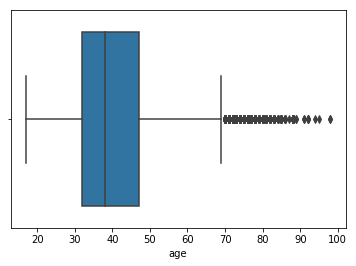

In [12]:
sns.boxplot(x='age', data=loan)
plt.show()

In [13]:
# Since there are a fair few data entries with age > 71, we will club all of those ages at 71 (since we can assume 
# that the behaviour will not change significantly with age at age above 70)

loan['age'][loan['age']>71] =71

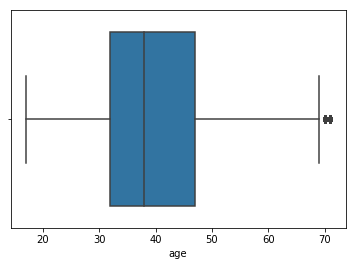

In [14]:
sns.boxplot(x='age', data=loan)
plt.show()

In [15]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], bins, include_lowest=True)

In [16]:
No_of_prospect = loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')

In [17]:
count_prospects = loan[loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')

In [18]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [19]:
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [20]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",422,202,47.9


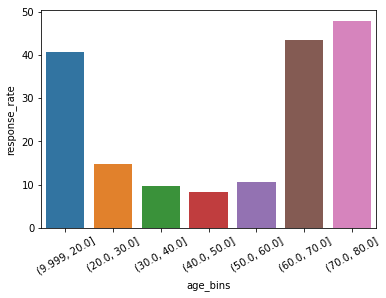

In [21]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [22]:
# Note that we have added a new column named age bucket to the table

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### Job

In [23]:
loan['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [24]:
count_prospects_job = loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')

In [25]:
No_of_prospect_job = loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')

In [26]:
agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')

In [27]:
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

In [28]:
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,12.97
1,blue-collar,638,9254,6.89
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1720,25.23
6,self-employed,149,1421,10.49
7,services,323,3969,8.14
8,student,275,875,31.43
9,technician,730,6743,10.83


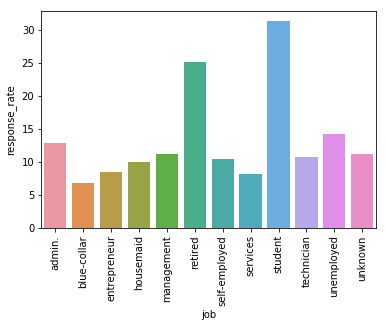

In [29]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is rreiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### Marital

In [30]:
loan['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [31]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [32]:
count_prospects_marital = loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')

In [33]:
No_of_prospect_job = loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')

In [34]:
agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')

In [35]:
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [36]:
agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


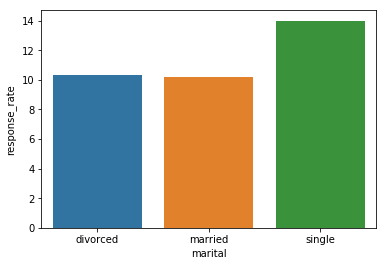

In [37]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You may note that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### Education

In [38]:
loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.

In [39]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [40]:
loan['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [41]:
count_prospects_education = loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')

In [42]:
No_of_prospect_education = loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')

In [43]:
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')

In [44]:
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [45]:
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary_Education,1031,9515,10.84
2,Tertiary_Education,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


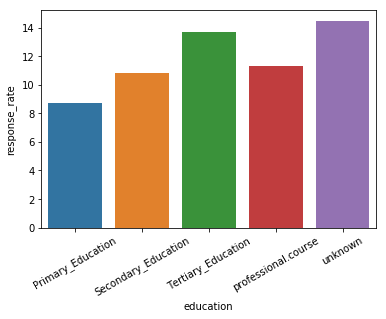

In [46]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

#### Previous Default

In [47]:
loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [48]:
count_prospects_default = loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')

In [49]:
No_of_prospect_default = loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')

In [50]:
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')

In [51]:
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

In [52]:
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


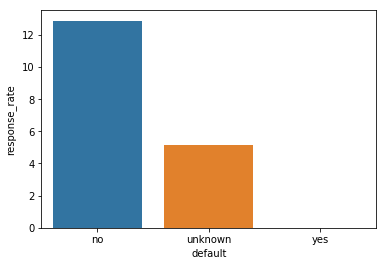

In [53]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Housing

In [54]:
loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [55]:
count_prospects_housing = loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')

In [56]:
No_of_prospect_housing = loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')

In [57]:
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')

In [58]:
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [59]:
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


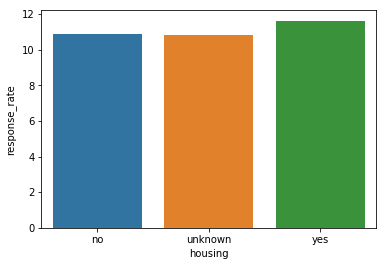

In [60]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### Loan

In [61]:
loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [62]:
count_prospects_loan = loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')

In [63]:
No_of_prospect_loan = loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')

In [64]:
agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')

In [65]:
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(4)

In [66]:
agg_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


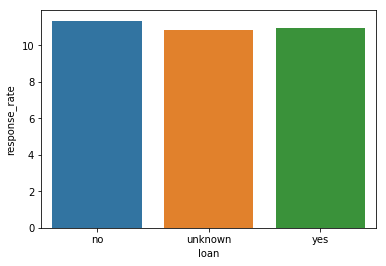

In [67]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can see there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product

Now that we have had a look at the client data, we will move to the last contact information.

There are four features in the given dataset which cover this information. (Refer to the data dictionary for the same)

- Contact: contact communication type
- Month: last contact month of year
- Day_of_week: last contact day of the week
- Duration: last contact duration, in seconds 

Please note that the attribute, duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Contact

In [68]:
loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [69]:
count_prospects_contact = loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')

In [70]:
No_of_prospect_contact = loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')

In [71]:
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')

In [72]:
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

In [73]:
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


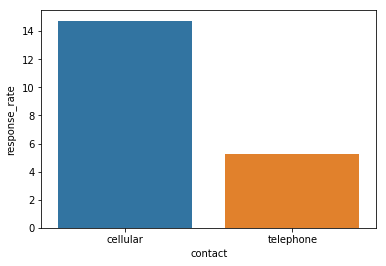

In [74]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that the prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### Month

In [75]:
loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [76]:
count_prospects_month = loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')

In [77]:
No_of_prospect_month = loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')

In [78]:
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')

In [79]:
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

In [80]:
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


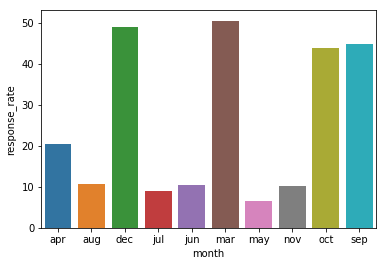

In [81]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### Day of the week

In [82]:
loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [83]:
count_prospects_day = loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')

In [84]:
No_of_prospect_day = loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')

In [85]:
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')

In [86]:
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

In [87]:
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


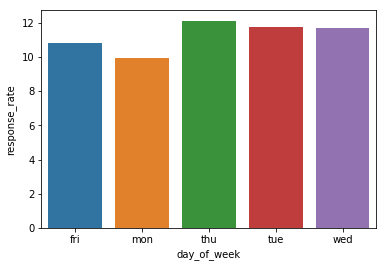

In [88]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can note that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### Duration of the call

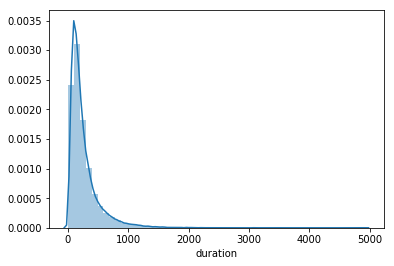

In [89]:
sns.distplot(loan['duration'])
plt.show()

As we know that this is a continuos variable, we will create a box plot

In [90]:
loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

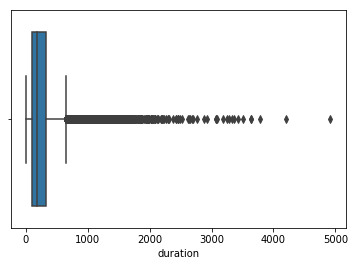

In [91]:
sns.boxplot(x='duration', data=loan)
plt.show()

Since less than one percent of entires have duration greater than 1271, we can assume all entries with duration greater than 1271 as having duration as 1271.

In [92]:
loan['duration'][loan['duration']>1271] =1271

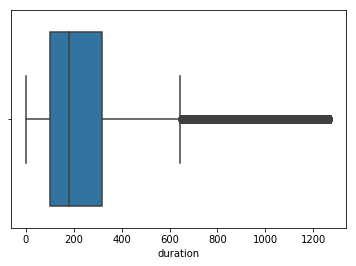

In [93]:
sns.boxplot(x='duration', data=loan)
plt.show()

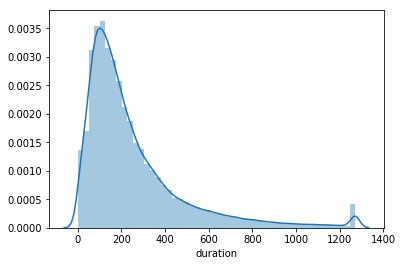

In [94]:
sns.distplot(loan['duration'])
plt.show()

Now that we have looked at client data and the data related to last contact, we will look at some of the other attributes.

- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

#### Campaign

In [95]:
loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

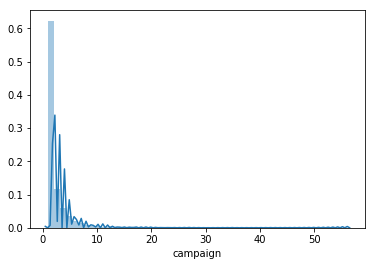

In [96]:
sns.distplot(loan['campaign'])
plt.show()

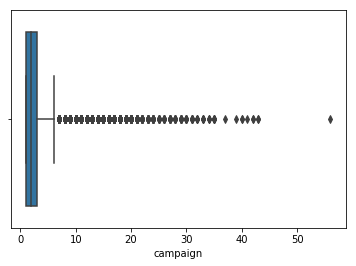

In [97]:
# We will create a box plot

sns.boxplot(x='campaign', data=loan)
plt.show()

In [98]:
loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

Once again, we can merga all data entries with contacts greater than 14 as having campaign contact as 14

In [99]:
loan['campaign'][loan['campaign']>14] =14

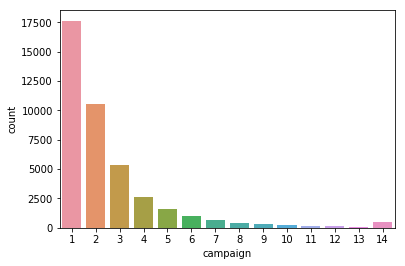

In [100]:
sns.countplot(loan['campaign'])
plt.show()

In [101]:
count_prospects_campaign = loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')

In [102]:
No_of_prospect_campaign = loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')

In [103]:
agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')

In [104]:
agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

In [105]:
agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


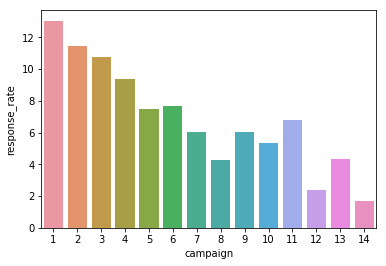

In [106]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [107]:
loan['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [108]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [109]:
loan['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [110]:
count_prospects_pdays = loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')

In [111]:
No_of_prospect_pdays = loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')

In [112]:
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')

In [113]:
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

In [114]:
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.86
1,Contacted_in_first_10days,851,1311,64.91
2,First_time_contacted,3673,39673,9.26


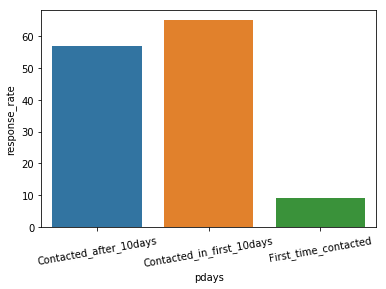

In [115]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

Though there is a huge difference in the response rates of the three categories, it is important to note that there is also a huge difference in the volume of data entries in these categories

#### Previous

In [116]:
loan['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories, that is never contacted, contacted less than three times and contacted greater than three times

In [117]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [118]:
loan['previous'].value_counts()

Never contacted      35563
Less_than_3_times     5531
More than_3_times       94
Name: previous, dtype: int64

In [119]:
count_prospects_previous = loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')

In [120]:
No_of_prospect_previous = loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')

In [121]:
agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')

In [122]:
agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

In [123]:
agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1445,5531,26.13
1,More than_3_times,54,94,57.45
2,Never contacted,3141,35563,8.83


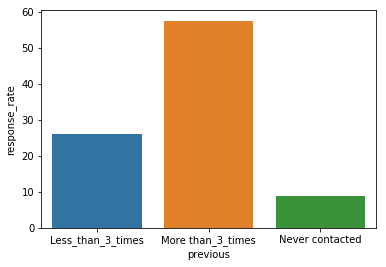

In [124]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator

In [125]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

#### Employment Variation Rate

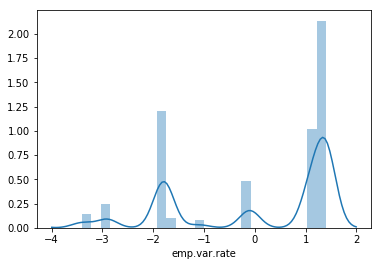

In [126]:
sns.distplot(loan['emp.var.rate'])
plt.show()

In [127]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [128]:
loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [129]:
count_prospects_emp_var_rate = loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')

In [130]:
No_of_prospect_emp_var_rate = loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')

In [131]:
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')

In [132]:
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

In [133]:
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


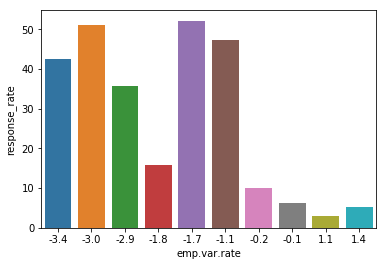

In [134]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

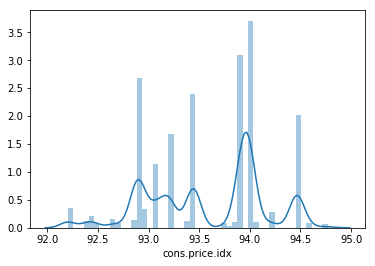

In [135]:
sns.distplot(loan['cons.price.idx'])
plt.show()

In [136]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [137]:
loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

#### Euribor three month rate

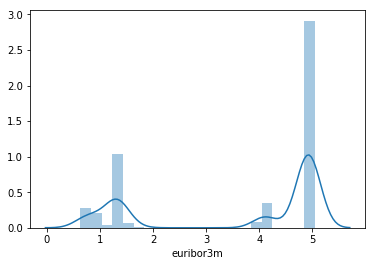

In [138]:
sns.distplot(loan['euribor3m'])
plt.show()

In [139]:
loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

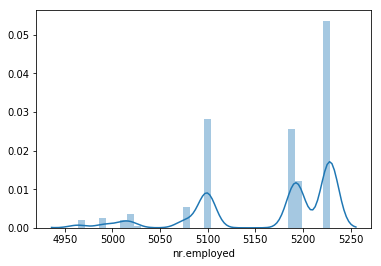

In [140]:
sns.distplot(loan['nr.employed'])
plt.show()

In [141]:
loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [142]:
loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Now that we have completed basic exploratory analysis, we can move to the next stage, that is data cleaning and data preparation

#### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [143]:
# inspect the columns

loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

In [144]:
# Droping the column age_bins we had created for the purpose of data visualisation

loan.drop(columns = 'age_bins', inplace = True)

In [145]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

loan = pd.concat([loan,job],axis=1)

In [146]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


Notice that we have created a set of dummy columns for the feature job. Similarly, we are going to do the same for other categorical variables.

In [147]:
# Creating dummy variable for marital column

marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [148]:
# Creating dummy variable for education column

education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [149]:
# Creating dummy variable for default column

default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [150]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [151]:
# Creating dummy variable for loan column

loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [152]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [153]:
# Creating dummy variable for month column

month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [154]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [155]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [156]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [157]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [158]:
# inspect the dataframe

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


In [159]:
# Drop all features for whom dummy variable has been created

loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [160]:
loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [161]:
# dropping the feature: duration
loan.drop(columns=['duration'],inplace=True)

In [162]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [163]:
# Putting feature variable to X
X = loan.drop(['response'],axis=1)

# Putting response variable to y
y = loan['response']

In [164]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Standardisation

In [165]:
X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
7019,31,4,1.1,93.994,-36.4,4.860,5191.0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
27175,51,3,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,...,0,0,0,0,0,1,0,1,1,0
15817,39,3,1.4,93.918,-42.7,4.960,5228.1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
40971,68,4,-1.1,94.601,-49.5,1.000,4963.6,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8467,37,3,1.4,94.465,-41.8,4.864,5228.1,0,0,0,...,0,0,1,0,0,1,0,1,1,0


In [166]:
# Standardisation continuous features for X_train
X_train_df = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [167]:
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [168]:
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [169]:
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [170]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [171]:
# Standardisation continuous features for X_train
X_test_df = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [172]:
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

In [173]:
X_test = X_test.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [174]:
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [175]:
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-1.182984,-0.651460,-1.199007,-1.172918,-1.237193,-1.348603,-0.944859
27585,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0.100062,0.663413,-0.118526,-0.644728,-0.332420,0.226981,0.393573
15722,1,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.590809,-0.651460,0.834840,0.590583,-0.483215,0.768913,0.840640
40349,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.182984,-0.213169,-1.135450,0.778116,0.464642,-1.574841,-2.432774
2576,0,0,0,0,0,0,1,0,0,0,...,1,1,0,1.481803,-0.213169,0.644167,0.721340,0.873944,0.708890,0.327136


In [176]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [177]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
#Selecting Top 20 variable using RFE
rfe_tt=RFE(logreg,20)
rfe_tt=rfe_tt.fit(X_train, y_train)

/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

In [179]:
#Significance of each feature in the model
list(zip(X_train.columns,rfe_tt.support_,rfe_tt.ranking_))

[('job_blue-collar', False, 3),
 ('job_entrepreneur', False, 2),
 ('job_housemaid', False, 23),
 ('job_management', False, 8),
 ('job_retired', True, 1),
 ('job_self-employed', False, 19),
 ('job_services', False, 16),
 ('job_student', True, 1),
 ('job_technician', False, 29),
 ('job_unemployed', False, 28),
 ('job_unknown', False, 14),
 ('marital_married', False, 21),
 ('marital_single', False, 18),
 ('education_Secondary_Education', False, 26),
 ('education_Tertiary_Education', False, 11),
 ('education_professional.course', False, 20),
 ('education_unknown', False, 7),
 ('default_unknown', True, 1),
 ('default_yes', False, 25),
 ('housing_unknown', False, 22),
 ('housing_yes', False, 24),
 ('loan_unknown', False, 13),
 ('loan_yes', False, 30),
 ('contact_telephone', True, 1),
 ('month_aug', True, 1),
 ('month_dec', True, 1),
 ('month_jul', False, 31),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', True, 1),
 ('month_oct', False, 17),
 ('mont

In [180]:
#Storing top 20 significant columns in a variable
tar_cols=X_train.columns[rfe_tt.support_]
tar_cols

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_sep', 'day_of_week_mon',
       'pdays_First_time_contacted', 'previous_More than_3_times',
       'previous_Never contacted', 'poutcome_nonexistent', 'poutcome_success',
       'emp.var.rate', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [181]:
#Performing logistic regression using these 20 features using stats model and filtering some features manually
x_train=sm.add_constant(X_train[tar_cols])
reg_mod=sm.GLM(y_train,x_train,family=sm.families.Binomial())
reg_mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28811
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7961.9
Date:                Mon, 06 Apr 2020   Deviance:                       15924.
Time:                        08:23:22   Pearson chi2:                 2.89e+04
No. Iterations:                    25   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4695      0.218     -6.745      0.000      -1.897      -1.043
job_retired                    0.2993      0.084      3.580      0.000       0.135       0.463
job_student                    0.3478      0.105      3.309      0.001       0.142       0.554
default_unknown               -0.3134      0.068     -4.638      0.000      -0.446      -0.181
contact_telephone             -0.5759      0.070     -8.254      0.000      -0.713      -0.439
month_aug                      0.5297      0.080      6.647      0.000       0.373       0.686
month_dec                      0.2891      0.201      1.440      0.150      -0.104       0.683
month_jun                     -0.5364      0.084     -6.417      0.000      -0.700      -0.373
month_mar                      1.3582      0.120     11.320      0.000       1.123       1.593
month_may                     -0.4707      0.065     -7.234      0.000      -0.598      -0.343
month_nov                     -0.5348      0.086     -6.208      0.000      -0.704      -0.366
month_sep                      0.2784      0.118      2.354      0.019       0.047       0.510
day_of_week_mon               -0.3264      0.054     -6.005      0.000      -0.433      -0.220
pdays_First_time_contacted    -1.0115      0.218     -4.635      0.000      -1.439      -0.584
previous_More than_3_times    -0.3152      0.283     -1.115      0.265      -0.869       0.239
previous_Never contacted       0.2439      0.034      7.259      0.000       0.178       0.310
poutcome_nonexistent           0.2439      0.034      7.259      0.000       0.178       0.310
poutcome_success               0.8535      0.220      3.877      0.000       0.422       1.285
emp.var.rate                  -2.3785      0.150    -15.859      0.000      -2.673      -2.085
cons.price.idx                 0.9701      0.057     16.973      0.000       0.858       1.082
euribor3m                      0.9938      0.125      7.956      0.000       0.749       1.239
==============================================================================================
"""

In [182]:
#Removing the previous_More than_3_times due to high p value
tar_cols=[x for x in tar_cols if x not in ['previous_More than_3_times']]

In [183]:
#looking at the p values of remaining features
x_train=sm.add_constant(X_train[tar_cols])
reg_mod=sm.GLM(y_train,x_train,family=sm.families.Binomial())
reg_mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28812
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7962.5
Date:                Mon, 06 Apr 2020   Deviance:                       15925.
Time:                        08:23:22   Pearson chi2:                 2.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5098      0.215     -7.021      0.000      -1.931      -1.088
job_retired                    0.2997      0.084      3.587      0.000       0.136       0.464
job_student                    0.3438      0.105      3.270      0.001       0.138       0.550
default_unknown               -0.3129      0.068     -4.632      0.000      -0.445      -0.180
contact_telephone             -0.5743      0.070     -8.233      0.000      -0.711      -0.438
month_aug                      0.5246      0.080      6.594      0.000       0.369       0.681
month_dec                      0.2889      0.201      1.439      0.150      -0.105       0.682
month_jun                     -0.5364      0.084     -6.416      0.000      -0.700      -0.373
month_mar                      1.3573      0.120     11.315      0.000       1.122       1.592
month_may                     -0.4723      0.065     -7.261      0.000      -0.600      -0.345
month_nov                     -0.5402      0.086     -6.280      0.000      -0.709      -0.372
month_sep                      0.2731      0.118      2.309      0.021       0.041       0.505
day_of_week_mon               -0.3264      0.054     -6.005      0.000      -0.433      -0.220
pdays_First_time_contacted    -0.9707      0.215     -4.508      0.000      -1.393      -0.549
previous_Never contacted       0.2442      0.034      7.269      0.000       0.178       0.310
poutcome_nonexistent           0.2442      0.034      7.269      0.000       0.178       0.310
poutcome_success               0.8846      0.219      4.047      0.000       0.456       1.313
emp.var.rate                  -2.3791      0.150    -15.865      0.000      -2.673      -2.085
cons.price.idx                 0.9660      0.057     16.939      0.000       0.854       1.078
euribor3m                      0.9970      0.125      7.985      0.000       0.752       1.242
==============================================================================================
"""

In [184]:
#Removing the month_dec due to high p value
tar_cols=[x for x in tar_cols if x not in ['month_dec']]

In [185]:
#looking at the p values of remaining features
x_train=sm.add_constant(X_train[tar_cols])
reg_mod=sm.GLM(y_train,x_train,family=sm.families.Binomial())
reg_mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28813
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7963.5
Date:                Mon, 06 Apr 2020   Deviance:                       15927.
Time:                        08:23:23   Pearson chi2:                 2.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5023      0.215     -6.989      0.000      -1.924      -1.081
job_retired                    0.3038      0.083      3.640      0.000       0.140       0.467
job_student                    0.3455      0.105      3.288      0.001       0.140       0.552
default_unknown               -0.3133      0.068     -4.638      0.000      -0.446      -0.181
contact_telephone             -0.5690      0.070     -8.173      0.000      -0.705      -0.433
month_aug                      0.5146      0.079      6.495      0.000       0.359       0.670
month_jun                     -0.5500      0.083     -6.621      0.000      -0.713      -0.387
month_mar                      1.3461      0.120     11.250      0.000       1.112       1.581
month_may                     -0.4830      0.065     -7.482      0.000      -0.609      -0.356
month_nov                     -0.5547      0.085     -6.492      0.000      -0.722      -0.387
month_sep                      0.2593      0.118      2.199      0.028       0.028       0.490
day_of_week_mon               -0.3246      0.054     -5.975      0.000      -0.431      -0.218
pdays_First_time_contacted    -0.9690      0.215     -4.500      0.000      -1.391      -0.547
previous_Never contacted       0.2429      0.034      7.237      0.000       0.177       0.309
poutcome_nonexistent           0.2429      0.034      7.237      0.000       0.177       0.309
poutcome_success               0.8905      0.219      4.074      0.000       0.462       1.319
emp.var.rate                  -2.3925      0.150    -15.995      0.000      -2.686      -2.099
cons.price.idx                 0.9662      0.057     16.951      0.000       0.854       1.078
euribor3m                      1.0070      0.125      8.084      0.000       0.763       1.251
==============================================================================================
"""

In [186]:
#looking at VIF of model 
vif=pd.DataFrame()
vif['Features']=X_train[tar_cols].columns
vif['VIF']=[variance_inflation_factor(X_train[tar_cols].values,i) for i in range(X_train[tar_cols].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,job_retired,1.090000
1,job_student,1.060000
2,default_unknown,1.340000
3,contact_telephone,4.790000
4,month_aug,2.570000
5,month_jun,2.370000
6,month_mar,1.120000
7,month_may,3.440000
8,month_nov,1.930000
9,month_sep,1.120000


In [187]:
#Removing the previous_Never contacted due to high vif value
tar_cols=[x for x in tar_cols if x not in ['previous_Never contacted']]

In [188]:
#looking at VIF of model 
vif=pd.DataFrame()
vif['Features']=X_train[tar_cols].columns
vif['VIF']=[variance_inflation_factor(X_train[tar_cols].values,i) for i in range(X_train[tar_cols].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,job_retired,1.09
1,job_student,1.06
2,default_unknown,1.34
3,contact_telephone,4.79
4,month_aug,2.57
5,month_jun,2.37
6,month_mar,1.12
7,month_may,3.44
8,month_nov,1.93
9,month_sep,1.12


In [189]:
#Removing the emp.var.rate due to high vif value
tar_cols=[x for x in tar_cols if x not in ['emp.var.rate']]

In [190]:
#looking at VIF of model 
vif=pd.DataFrame()
vif['Features']=X_train[tar_cols].columns
vif['VIF']=[variance_inflation_factor(X_train[tar_cols].values,i) for i in range(X_train[tar_cols].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,job_retired,1.08
1,job_student,1.06
2,default_unknown,1.33
3,contact_telephone,3.82
4,month_aug,2.01
5,month_jun,2.14
6,month_mar,1.09
7,month_may,3.27
8,month_nov,1.66
9,month_sep,1.12


In [191]:
#looking at the p values of the remaining features in the model
x_train=sm.add_constant(X_train[tar_cols])
reg_mod=sm.GLM(y_train,x_train,family=sm.families.Binomial())
reg_mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28814
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8087.7
Date:                Mon, 06 Apr 2020   Deviance:                       16175.
Time:                        08:23:25   Pearson chi2:                 3.09e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3833      0.213     -6.494      0.000      -1.801      -0.966
job_retired                    0.4276      0.082      5.234      0.000       0.268       0.588
job_student                    0.4290      0.103      4.152      0.000       0.226       0.632
default_unknown               -0.3611      0.067     -5.373      0.000      -0.493      -0.229
contact_telephone             -0.1983      0.063     -3.156      0.002      -0.321      -0.075
month_aug                      0.0485      0.072      0.677      0.498      -0.092       0.189
month_jun                      0.0536      0.075      0.718      0.473      -0.093       0.200
month_mar                      0.8199      0.116      7.069      0.000       0.593       1.047
month_may                     -0.8797      0.059    -14.937      0.000      -0.995      -0.764
month_nov                     -0.0949      0.079     -1.194      0.232      -0.251       0.061
month_sep                      0.2465      0.118      2.084      0.037       0.015       0.478
day_of_week_mon               -0.3237      0.054     -6.034      0.000      -0.429      -0.219
pdays_First_time_contacted    -1.1548      0.213     -5.420      0.000      -1.572      -0.737
poutcome_nonexistent           0.4779      0.066      7.288      0.000       0.349       0.606
poutcome_success               0.8134      0.216      3.763      0.000       0.390       1.237
cons.price.idx                 0.1690      0.027      6.343      0.000       0.117       0.221
euribor3m                     -0.9304      0.030    -30.564      0.000      -0.990      -0.871
==============================================================================================
"""

In [192]:
#Removing the month_aug due to high p value
tar_cols=[x for x in tar_cols if x not in ['month_aug']]

In [193]:
#looking at VIF of model 
vif=pd.DataFrame()
vif['Features']=X_train[tar_cols].columns
vif['VIF']=[variance_inflation_factor(X_train[tar_cols].values,i) for i in range(X_train[tar_cols].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,job_retired,1.07
1,job_student,1.06
2,default_unknown,1.33
3,contact_telephone,3.81
4,month_jun,2.13
5,month_mar,1.08
6,month_may,2.96
7,month_nov,1.36
8,month_sep,1.12
9,day_of_week_mon,1.26


In [194]:
#Performing logistic regression using these remaining features using stats model 
#and filtering some features manually
x_train=sm.add_constant(X_train[tar_cols])
reg_mod=sm.GLM(y_train,x_train,family=sm.families.Binomial())
reg_mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28815
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8088.0
Date:                Mon, 06 Apr 2020   Deviance:                       16176.
Time:                        08:23:26   Pearson chi2:                 3.09e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3578      0.210     -6.479      0.000      -1.769      -0.947
job_retired                    0.4297      0.082      5.264      0.000       0.270       0.590
job_student                    0.4318      0.103      4.185      0.000       0.230       0.634
default_unknown               -0.3625      0.067     -5.397      0.000      -0.494      -0.231
contact_telephone             -0.1990      0.063     -3.169      0.002      -0.322      -0.076
month_jun                      0.0438      0.073      0.598      0.550      -0.100       0.187
month_mar                      0.8083      0.115      7.049      0.000       0.584       1.033
month_may                     -0.8926      0.056    -16.045      0.000      -1.002      -0.784
month_nov                     -0.1123      0.075     -1.493      0.135      -0.260       0.035
month_sep                      0.2376      0.118      2.021      0.043       0.007       0.468
day_of_week_mon               -0.3243      0.054     -6.046      0.000      -0.429      -0.219
pdays_First_time_contacted    -1.1645      0.212     -5.480      0.000      -1.581      -0.748
poutcome_nonexistent           0.4768      0.066      7.275      0.000       0.348       0.605
poutcome_success               0.8092      0.216      3.747      0.000       0.386       1.233
cons.price.idx                 0.1635      0.025      6.442      0.000       0.114       0.213
euribor3m                     -0.9240      0.029    -31.873      0.000      -0.981      -0.867
==============================================================================================
"""

In [195]:
#Removing the pdays_First_time_contacted due to high p value
tar_cols=[x for x in tar_cols if x not in ['pdays_First_time_contacted']]

In [196]:
#looking at VIF of model 
vif=pd.DataFrame()
vif['Features']=X_train[tar_cols].columns
vif['VIF']=[variance_inflation_factor(X_train[tar_cols].values,i) for i in range(X_train[tar_cols].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,job_retired,1.07
1,job_student,1.05
2,default_unknown,1.31
3,contact_telephone,3.81
4,month_jun,2.07
5,month_mar,1.08
6,month_may,2.79
7,month_nov,1.26
8,month_sep,1.11
9,day_of_week_mon,1.24


In [197]:
#Performing logistic regression using these remaining features using stats model 
#and filtering some features manually
x_train=sm.add_constant(X_train[tar_cols])
reg_mod=sm.GLM(y_train,x_train,family=sm.families.Binomial())
reg_mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28816
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8102.5
Date:                Mon, 06 Apr 2020   Deviance:                       16205.
Time:                        08:23:27   Pearson chi2:                 3.10e+04
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.4488      0.068    -35.914      0.000      -2.582      -2.315
job_retired              0.4318      0.081      5.298      0.000       0.272       0.592
job_student              0.4623      0.103      4.507      0.000       0.261       0.663
default_unknown         -0.3645      0.067     -5.429      0.000      -0.496      -0.233
contact_telephone       -0.2003      0.063     -3.191      0.001      -0.323      -0.077
month_jun                0.0350      0.073      0.478      0.632      -0.108       0.178
month_mar                0.8106      0.114      7.091      0.000       0.587       1.035
month_may               -0.9029      0.056    -16.254      0.000      -1.012      -0.794
month_nov               -0.1012      0.075     -1.349      0.177      -0.248       0.046
month_sep                0.2412      0.117      2.057      0.040       0.011       0.471
day_of_week_mon         -0.3240      0.054     -6.047      0.000      -0.429      -0.219
poutcome_nonexistent     0.4043      0.063      6.399      0.000       0.280       0.528
poutcome_success         1.8914      0.090     21.045      0.000       1.715       2.068
cons.price.idx           0.1740      0.025      6.883      0.000       0.124       0.224
euribor3m               -0.9331      0.029    -32.277      0.000      -0.990      -0.876
========================================================================================
"""

In [198]:
#Removing the month_jun due to high p value
tar_cols=[x for x in tar_cols if x not in ['month_jun']]

In [199]:
#Performing logistic regression using these remaining features using stats model 
#and filtering some features manually
x_train=sm.add_constant(X_train[tar_cols])
reg_mod=sm.GLM(y_train,x_train,family=sm.families.Binomial())
reg_mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28817
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8102.6
Date:                Mon, 06 Apr 2020   Deviance:                       16205.
Time:                        08:23:27   Pearson chi2:                 3.10e+04
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.4441      0.067    -36.225      0.000      -2.576      -2.312
job_retired              0.4296      0.081      5.279      0.000       0.270       0.589
job_student              0.4612      0.103      4.496      0.000       0.260       0.662
default_unknown         -0.3642      0.067     -5.426      0.000      -0.496      -0.233
contact_telephone       -0.1904      0.059     -3.218      0.001      -0.306      -0.074
month_mar                0.8040      0.113      7.085      0.000       0.582       1.026
month_may               -0.9107      0.053    -17.174      0.000      -1.015      -0.807
month_nov               -0.1062      0.074     -1.431      0.152      -0.252       0.039
month_sep                0.2330      0.116      2.009      0.045       0.006       0.460
day_of_week_mon         -0.3238      0.054     -6.042      0.000      -0.429      -0.219
poutcome_nonexistent     0.4049      0.063      6.409      0.000       0.281       0.529
poutcome_success         1.8916      0.090     21.046      0.000       1.715       2.068
cons.price.idx           0.1762      0.025      7.097      0.000       0.128       0.225
euribor3m               -0.9349      0.029    -32.648      0.000      -0.991      -0.879
========================================================================================
"""

In [200]:
#Removing the month_nov due to high p value
tar_cols=[x for x in tar_cols if x not in ['month_nov']]

In [201]:
#Performing logistic regression using these remaining features using stats model 
#and filtering some features manually
x_train=sm.add_constant(X_train[tar_cols])
reg_mod=sm.GLM(y_train,x_train,family=sm.families.Binomial())
reg_mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28818
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8103.7
Date:                Mon, 06 Apr 2020   Deviance:                       16207.
Time:                        08:23:27   Pearson chi2:                 3.10e+04
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.4689      0.065    -37.845      0.000      -2.597      -2.341
job_retired              0.4313      0.081      5.299      0.000       0.272       0.591
job_student              0.4625      0.103      4.507      0.000       0.261       0.664
default_unknown         -0.3582      0.067     -5.346      0.000      -0.489      -0.227
contact_telephone       -0.1872      0.059     -3.164      0.002      -0.303      -0.071
month_mar                0.8167      0.113      7.217      0.000       0.595       1.038
month_may               -0.8965      0.052    -17.196      0.000      -0.999      -0.794
month_sep                0.2427      0.116      2.096      0.036       0.016       0.470
day_of_week_mon         -0.3235      0.054     -6.035      0.000      -0.429      -0.218
poutcome_nonexistent     0.4127      0.063      6.563      0.000       0.289       0.536
poutcome_success         1.8911      0.090     21.046      0.000       1.715       2.067
cons.price.idx           0.1823      0.024      7.452      0.000       0.134       0.230
euribor3m               -0.9426      0.028    -33.505      0.000      -0.998      -0.887
========================================================================================
"""

In [202]:
#looking at VIF of model 
vif=pd.DataFrame()
vif['Features']=X_train[tar_cols].columns
vif['VIF']=[variance_inflation_factor(X_train[tar_cols].values,i) for i in range(X_train[tar_cols].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,job_retired,1.07
1,job_student,1.05
2,default_unknown,1.31
3,contact_telephone,3.13
4,month_mar,1.06
5,month_may,2.06
6,month_sep,1.09
7,day_of_week_mon,1.24
8,poutcome_nonexistent,2.47
9,poutcome_success,1.14


In [203]:
#Removing the month_sep due to high vif value
tar_cols=[x for x in tar_cols if x not in ['month_sep']]

In [204]:
#Performing logistic regression using these remaining features using stats model 
#and filtering some features manually
x_train=sm.add_constant(X_train[tar_cols])
reg_mod=sm.GLM(y_train,x_train,family=sm.families.Binomial())
reg_mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28819
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.9
Date:                Mon, 06 Apr 2020   Deviance:                       16212.
Time:                        08:23:28   Pearson chi2:                 3.11e+04
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.4614      0.065    -37.812      0.000      -2.589      -2.334
job_retired              0.4359      0.081      5.363      0.000       0.277       0.595
job_student              0.4604      0.103      4.490      0.000       0.259       0.661
default_unknown         -0.3605      0.067     -5.381      0.000      -0.492      -0.229
contact_telephone       -0.1840      0.059     -3.112      0.002      -0.300      -0.068
month_mar                0.7977      0.113      7.068      0.000       0.577       1.019
month_may               -0.9108      0.052    -17.626      0.000      -1.012      -0.810
day_of_week_mon         -0.3258      0.054     -6.080      0.000      -0.431      -0.221
poutcome_nonexistent     0.4114      0.063      6.548      0.000       0.288       0.535
poutcome_success         1.8948      0.090     21.107      0.000       1.719       2.071
cons.price.idx           0.1871      0.024      7.678      0.000       0.139       0.235
euribor3m               -0.9542      0.028    -34.601      0.000      -1.008      -0.900
========================================================================================
"""

In [205]:
#below are the relevant predictor variables for a response
tar_cols

['job_retired',
 'job_student',
 'default_unknown',
 'contact_telephone',
 'month_mar',
 'month_may',
 'day_of_week_mon',
 'poutcome_nonexistent',
 'poutcome_success',
 'cons.price.idx',
 'euribor3m']

## Building Predictive Model

In [206]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [207]:
#Initiating PCA for training set
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [208]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      32.80
1      43.59
2      52.43
3      60.59
4      66.34
5      69.65
6      72.24
7      74.59
8      76.82
9      78.77
10     80.65
11     82.50
12     84.31
13     86.07
14     87.70
15     89.18
16     90.44
17     91.58
18     92.63
19     93.37
20     94.08
21     94.67
22     95.19
23     95.70
24     96.16
25     96.57
26     96.96
27     97.36
28     97.70
29     98.01
30     98.30
31     98.57
32     98.82
33     99.04
34     99.21
35     99.37
36     99.51
37     99.63
38     99.74
39     99.80
40     99.86
41     99.89
42     99.93
43     99.95
44     99.97
45     99.99
46    100.00
47    100.00
48    100.00
49    100.00
dtype: float64


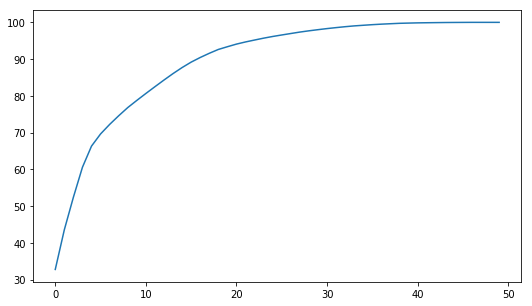

In [209]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20))
plt.plot(cumulative_variance)
plt.show()

In [210]:
# create pipeline
PCA_VARS = 16
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [211]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8157885609240054

In [212]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[9150 1825]
 [ 535  847]]
Sensitivity: 	0.61
Specificity: 	0.83
AUC:    	 0.78


In [213]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.886997
1    0.113003
Name: response, dtype: float64

In [214]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [16,17,18,19,20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [215]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_sca...
                                       

In [216]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.7851214071881795
Best hyperparameters:  {'logistic__C': 1, 'logistic__penalty': 'l2', 'pca__n_components': 16}


In [217]:
# create pipeline
PCA_VARS = 16
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced',C=2,penalty='l2'))
        ]
pipeline = Pipeline(steps)

In [218]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8158926155873886

In [219]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[9151 1824]
 [ 535  847]]
Sensitivity: 	0.61
Specificity: 	0.83
AUC:    	 0.78


In [220]:
cols=[x for x in X_train.columns if x!='prob']

In [221]:
y_train_prob=pipeline.predict_proba(X_train)

In [222]:
y_train_pred=pipeline.predict(X_train[cols])

In [223]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [224]:
X_train['prob']=y_train_prob[:,1]

In [225]:
y_train_prob[:,1]

array([0.20121399, 0.29688113, 0.33789838, ..., 0.27765226, 0.23405972,
       0.89498658])

In [226]:
#Function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

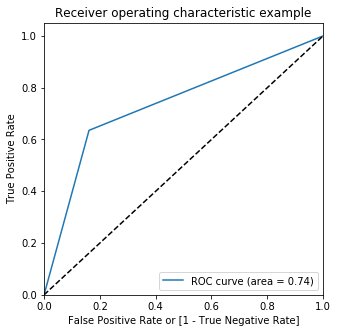

In [227]:
# Roc curve which is desirable and occupying maximum area possible
draw_roc(y_train, y_train_pred)

In [229]:
#predicting the target values by using different cut offs
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    X_train[i]=X_train.prob.map(lambda x: 1 if x> i else 0)
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,1,0,0,0,0,0,0,0
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
40971,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,1,0,0,0,0,0,0,0


In [230]:
#For different cut offs calculating the metrics
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train, X_train[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.113003  1.000000  0.000000
0.1   0.1  0.113107  1.000000  0.000117
0.2   0.2  0.217995  0.971148  0.122043
0.3   0.3  0.470119  0.862799  0.420092
0.4   0.4  0.725122  0.719767  0.725805
0.5   0.5  0.815893  0.635359  0.838893
0.6   0.6  0.849017  0.587477  0.882337
0.7   0.7  0.875447  0.495703  0.923826
0.8   0.8  0.882279  0.402701  0.943378
0.9   0.9  0.893726  0.180172  0.984632


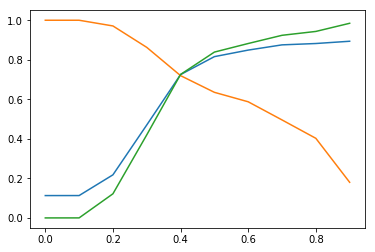

In [231]:
#Plotting the metrics accuracy,sensitivity,specificity as the intersection is around 0.4 
#so we take cutoff as 0.4 for now
plt.plot(cutoff_df['accuracy'])
plt.plot(cutoff_df['sensi'])
plt.plot(cutoff_df['speci'])
plt.show()

In [586]:
y_test_p=pd.Series(map(lambda x:1 if x>0.35 else 0,y_test_prob))

In [587]:
#Accuracy for the test set
round(metrics.accuracy_score(y_test, y_test_p)*100,2)

62.9

In [588]:
#Senstivity of the test set
cm1 = metrics.confusion_matrix(y_test, y_test_p)

sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])

sensi

0.7670043415340086

### looking for a better Model: Building Model Random Forest 

In [242]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [295]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1,15,2)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='recall',return_train_score=True)
rf.fit(X_train[cols], y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [296]:
# scores of GridSearch CV
scores = rf.cv_results_
sc=pd.DataFrame(scores)
sc.head()

sc[sc['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.62765,0.001686,0.050722,0.000294,3,{'max_depth': 3},0.722393,0.674347,0.703533,0.703988,...,0.693981,0.020914,1,0.701458,0.678558,0.709244,0.70683,0.683039,0.695826,0.012606


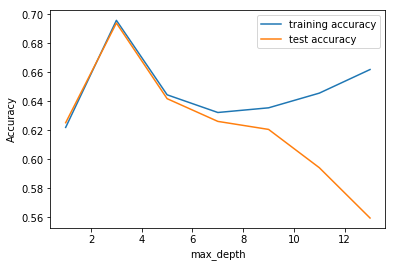

In [297]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [249]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(0,200,20)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='accuracy',return_train_score=True)
rf.fit(X_train[cols], y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [250]:
# scores of GridSearch CV
scores = rf.cv_results_
sc=pd.DataFrame(scores)
sc.head()

sc[sc['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,3.965433,0.067384,0.254329,0.002628,160,{'n_estimators': 160},0.89544,0.89334,0.895595,0.887097,...,0.893517,0.003347,1,0.995578,0.995794,0.996011,0.995708,0.995794,0.995777,0.000141


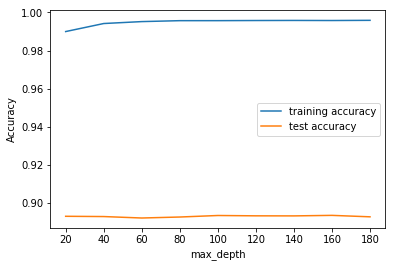

In [251]:
# plotting accuracies with estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [298]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': range(1,50,5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='recall',return_train_score=True)
rf.fit(X_train[cols], y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [299]:
# scores of GridSearch CV
scores = rf.cv_results_
sc=pd.DataFrame(scores)
sc.head()

sc[sc['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,4.769941,0.101639,0.150268,0.000861,21,{'max_features': 21},0.29908,0.261137,0.267281,0.268405,...,0.276849,0.014395,1,0.998465,0.998082,0.999233,1.0,0.997314,0.998619,0.000927


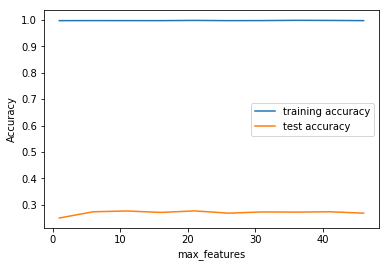

In [300]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [258]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 10)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='accuracy',return_train_score=True)
rf.fit(X_train[cols], y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [259]:
# scores of GridSearch CV
scores = rf.cv_results_
sc=pd.DataFrame(scores)
sc[sc['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.437791,0.035133,0.161129,0.00171,1,{'min_samples_leaf': 1},0.894746,0.892126,0.896289,0.885883,...,0.893205,0.004023,1,0.995534,0.995794,0.996228,0.995794,0.995968,0.995864,0.000229


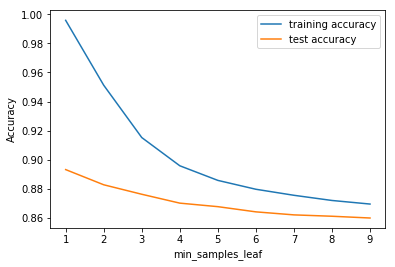

In [260]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [492]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(1,15,2)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='accuracy',return_train_score=True)
rf.fit(X_train[cols], y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [493]:
# scores of GridSearch CV
scores = rf.cv_results_
sc=pd.DataFrame(scores)
sc[sc['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,2.451253,0.065894,0.162728,0.002133,3,{'min_samples_split': 3},0.893706,0.889698,0.894901,0.883628,...,0.890777,0.003981,1,0.991805,0.991936,0.992023,0.992543,0.99276,0.992213,0.000371


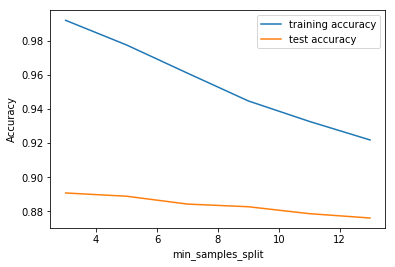

In [494]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#5,45

In [495]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [9,12,14],
    'min_samples_leaf': [3,5,7],
    'min_samples_split': [3,9],
    'n_estimators': [20,80,160], 
    'max_features': [6,22]
}
# Create a based mo
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [496]:
# Fit the grid search to the data
grid_search.fit(X_train[cols], y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 13.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [497]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)


We can get accuracy of 0.8750302849209453 using {'max_depth': 14, 'max_features': 22, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 160}


In [556]:
rfc = RandomForestClassifier(
                             max_depth=14,
                             min_samples_leaf=3, 
                             min_samples_split=3,
                             max_features=22,
                             n_estimators=160,
                             class_weight='balanced'
                           )
rfc.fit(X_train[cols], y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=14, max_features=22,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [557]:
y_train_pred_rf=rfc.predict(X_train[cols])

In [558]:
#Accuracy for the train set with default cuttoff=0.5
round(metrics.accuracy_score(y_train, y_train_pred_rf)*100,2)


90.27

In [559]:
#Sensitivity for the train set with default cuttoff=0.5
cm1 = metrics.confusion_matrix(y_train, y_train_pred_rf)

sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])

sensi

0.6964395334561081

In [560]:
y_test_pred_rf=rfc.predict(X_test[cols])

#Accuracy for the test set with default cuttoff=0.5
round(metrics.accuracy_score(y_test, y_test_pred_rf)*100,2)


87.49

In [561]:
#Sensitivity for the test set with default cuttoff=0.5
cm1 = metrics.confusion_matrix(y_test, y_test_pred_rf)

sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])

sensi

0.5434153400868307

In [301]:
X_train_rf=X_train[cols]

In [303]:
X_train_rf.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [562]:
X_train_rf['proba']=rfc.predict_proba(X_train_rf[cols])[:,1]

In [563]:
#predicting the target values by using different cut offs
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    X_train_rf[i]=X_train_rf.proba.map(lambda x: 1 if x> i else 0)
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,rf_proba,actual
7019,0,0,0,0,0,0,0,0,0,0,...,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618,0.093387,0
27175,0,0,0,0,0,0,0,0,1,0,...,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051,0.186619,0
15817,0,0,0,0,0,0,0,0,0,0,...,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088,0.238339,0
40971,0,0,0,0,1,0,0,0,0,0,...,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633,0.537379,0
8467,0,0,0,0,0,0,0,0,1,0,...,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088,0.173692,0


In [564]:
#For different cut offs calculating the metrics
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train, X_train_rf[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.113003  1.000000  0.000000
0.1   0.1  0.225625  1.000000  0.126970
0.2   0.2  0.527141  1.000000  0.466899
0.3   0.3  0.811661  0.966237  0.791968
0.4   0.4  0.886962  0.830264  0.894185
0.5   0.5  0.902674  0.696440  0.928949
0.6   0.6  0.915612  0.622775  0.952919
0.7   0.7  0.929728  0.567219  0.975912
0.8   0.8  0.927266  0.418048  0.992140
0.9   0.9  0.907808  0.189687  0.999296


In [565]:
#looking at the matrix we can consider the cuttoff to be 0.35
X_train_rf[0.35]=X_train_rf.proba.map(lambda x: 1 if x> 0.35 else 0)

In [566]:
cm1 = metrics.confusion_matrix(y_train, X_train_rf[0.35] )
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
    
speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
cutoff_df.loc[0.35] =[ 0.35 ,accuracy,sensi,speci]

In [577]:
print(cutoff_df)

        prob  accuracy     sensi     speci
0.000  0.000  0.113003  1.000000  0.000000
0.100  0.100  0.225625  1.000000  0.126970
0.200  0.200  0.527141  1.000000  0.466899
0.300  0.300  0.811661  0.966237  0.791968
0.400  0.400  0.886962  0.830264  0.894185
0.500  0.500  0.902674  0.696440  0.928949
0.600  0.600  0.915612  0.622775  0.952919
0.700  0.700  0.929728  0.567219  0.975912
0.800  0.800  0.927266  0.418048  0.992140
0.900  0.900  0.907808  0.189687  0.999296
0.350  0.350  0.865527  0.904236  0.860595
0.353  0.353  0.630817  0.784370  0.611481


In [568]:
#predicting the target variable with test set
y_test_proba=rfc.predict_proba(X_test[cols])[:,1]

In [583]:
y_test_pred=pd.Series(map(lambda x: 1 if x> 0.35 else 0,y_test_proba))

In [584]:
cm1 = metrics.confusion_matrix(y_test, y_test_pred )
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1
    
speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
cutoff_df.loc[0.353] =[ 0.353,accuracy,sensi,speci]

In [585]:
print(accuracy,sensi,speci)

0.8117666100186129 0.6309696092619392 0.8345330296127562


In [429]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,1,0,0,0,0,0,0,0
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
40971,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,1,0,0,0,0,0,0,0


In [437]:
loan.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,job_entrepreneur,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,37,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,40,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,56,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [438]:
X_train['rf_proba']=rfc.predict_proba(X_train[cols])[:,1]

In [578]:
X_test['rf_proba']=rfc.predict_proba(X_test[cols])[:,1]

In [440]:
X_train.columns

Index([                'job_blue-collar',                'job_entrepreneur',
                         'job_housemaid',                  'job_management',
                           'job_retired',               'job_self-employed',
                          'job_services',                     'job_student',
                        'job_technician',                  'job_unemployed',
                           'job_unknown',                 'marital_married',
                        'marital_single',   'education_Secondary_Education',
          'education_Tertiary_Education',   'education_professional.course',
                     'education_unknown',                 'default_unknown',
                           'default_yes',                 'housing_unknown',
                           'housing_yes',                    'loan_unknown',
                              'loan_yes',               'contact_telephone',
                             'month_aug',                       'month_dec',

In [441]:
drop_cols=[x for x in X_train.columns if x not in cols+['rf_proba']]
drop_cols

['prob', 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [442]:
X_train.drop(columns=drop_cols,inplace=True)

In [449]:
len(X_train.columns)

52

In [444]:
len(loan.columns)

51

In [445]:
X_train['actual']=y_train

In [447]:
X_test.columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_Secondary_Education',
       'education_Tertiary_Education', 'education_professional.course',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pdays_Contacted_in_first_10days',
       'pdays_First_time_contacted', 'previous_More than_3_times',
       'previous_Never contacted', 'poutcome_nonexistent', 'poutcome_success',
       'age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       

In [448]:
X_test['actual']=y_test

In [454]:
len(X_train)

28831

In [451]:
len(X_test)

12357

In [452]:
len(loan)

41188

In [455]:
full_ds=X_train.append(X_test)

In [457]:
len(full_ds)

41188

In [594]:
#Assiging index values as prospect ids for test set
X_test['prospect_id']=X_test.index

In [472]:
#Assiging index values as prospect ids for original data set
loan_copy['prospect_id']=loan_copy.index

In [464]:
full_ds.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,rf_proba,actual,prospect_id
7019,0,0,0,0,0,0,0,0,0,0,...,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618,0.093387,0,7019
27175,0,0,0,0,0,0,0,0,1,0,...,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051,0.186619,0,27175
15817,0,0,0,0,0,0,0,0,0,0,...,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088,0.238339,0,15817
40971,0,0,0,0,1,0,0,0,0,0,...,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633,0.537379,0,40971
8467,0,0,0,0,0,0,0,0,1,0,...,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088,0.173692,0,8467


In [597]:
len(X_test)

12357

In [595]:
#Joining with original data set to get the duration feature and predicted variables together
loan_prob_df=loan_copy.merge(X_test[['rf_proba','prospect_id']],how='inner',on='prospect_id')

In [596]:
len(loan_prob_df)

12357

In [598]:
loan_prob_df['response_pred']=loan_prob_df.rf_proba.map(lambda x: 1 if x> 0.35 else 0)

In [599]:
cost_df=loan_prob_df[['prospect_id','response','response_pred','rf_proba','duration']]

In [610]:
cost_df.head()

,prospect_id,response,response_pred,rf_proba,duration,cost_of_call
0,7,0,0,0.083876,217,21.7
1,8,0,0,0.272452,380,38.0
2,12,0,0,0.158996,137,13.7
3,19,0,0,0.083262,195,19.5
4,22,0,0,0.116016,342,34.2


In [611]:
#Cost of call is taken as 10paise per sec and is denoted in Rs.
cost_df['cost_of_call']=(cost_df['duration']*10)/100
cost_df.head()

,prospect_id,response,response_pred,rf_proba,duration,cost_of_call
0,7,0,0,0.083876,217,21.7
1,8,0,0,0.272452,380,38.0
2,12,0,0,0.158996,137,13.7
3,19,0,0,0.083262,195,19.5
4,22,0,0,0.116016,342,34.2


In [612]:
decile_df=cost_df[['response','rf_proba','response_pred']]

In [613]:
decile_df.rename(columns={'response':'actual','rf_proba':'pred_prob','reponse_pred':'predicted'},inplace=True)

In [604]:
#decile_df=pd.DataFrame(columns=['actual','pred_prob','predicted'])
#decile_df['actual']=y_test
#decile_df['pred_prob']=X_test['rf_proba']
#decile_df['predicted']=decile_df.pred_prob.map(lambda x: 1 if x> 0.35 else 0)

In [614]:
decile_df.head()

,actual,pred_prob,response_pred
0,0,0.083876,0
1,0,0.272452,0
2,0,0.158996,0
3,0,0.083262,0
4,0,0.116016,0


In [615]:
decile_df['decile'] = pd.qcut(decile_df['pred_prob'], 10, labels=np.arange(10, 0, -1))

lift_df = decile_df.groupby('decile')['pred_prob'].count().reset_index()

lift_df.rename({'pred_prob':'total'}, axis=1, inplace=True)

lift_df_pred = decile_df[decile_df['actual']==1].groupby('decile')['actual'].count().reset_index()

lift_df.info()

lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

lift_df_final['cumresp'] = lift_df_final['actual'].cumsum()

lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual']))

lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

lift_df_final

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 570.0 bytes


,decile,total,actual,cumresp,gain,cumlift
9,1,1236,627,627,45.369030,4.536903
8,2,1236,225,852,61.649783,3.082489
7,3,1235,118,970,70.188133,2.339604
6,4,1236,89,1059,76.628075,1.915702
5,5,1235,66,1125,81.403763,1.628075
4,6,1236,61,1186,85.817656,1.430294
3,7,1236,61,1247,90.231548,1.289022
2,8,1235,64,1311,94.862518,1.185781
1,9,1236,38,1349,97.612156,1.084580
0,10,1236,33,1382,100.000000,1.000000


Note that you can attain 80% of total conversions by targeting only 50% of the total client base. This can be used in cost optimization and depending on the cost per call, we can determine, how many people should be part of the tele marketing campaign



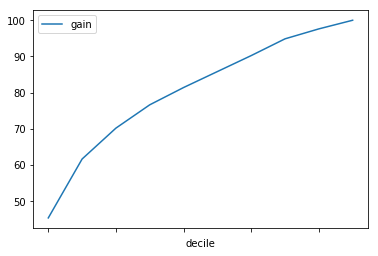

In [616]:
#projecting the gain chart
lift_df_final.plot.line(x='decile', y=['gain'])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

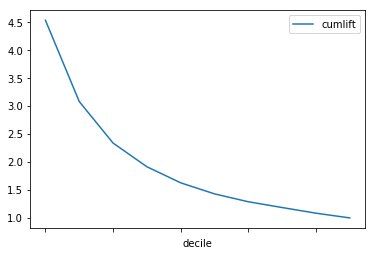

In [609]:
#projecting the gain chart
lift_df_final.plot.line(x='decile', y=['cumlift'])
plt.show

In [621]:
decile_top_5=decile_df[decile_df['decile']>=5]

In [622]:
len(decile_top_5)

6178

In [623]:
decile_top_5['decile'].unique()

[4, 5, 3, 2, 1]
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [629]:
cost_df['id']=cost_df.index
decile_top_5['id']=decile_top_5.index

In [632]:
#Creating data set of top 5 decile
cost_df_5dec=cost_df.merge(decile_top_5[['decile','id']],how='inner',on='id')

In [641]:
#average call duration for targeting the top 80% prospects
print('Avg Call Duration:',round(cost_df_5dec['duration'].mean(),2))

Avg Call Duration: 266.7


In [643]:
#average call cost in (Rs) for targeting the top 80% prospects
print('Avg Call cost in (Rs):',round(cost_df_5dec['cost_of_call'].mean(),2))

Avg Call cost in (Rs): 26.67


In [638]:
#Determine the cost of acquisition
Cost_of_Aqu=1*len(cost_df_5dec)
print('Cost of Acquisition:',Cost_of_Aqu)

Cost of Acquisition: 6178
